Mount gg Drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
colab_notebooks_path = '/content/drive/MyDrive/Colab Notebooks'

# Liệt kê nội dung trong thư mục
if os.path.exists(colab_notebooks_path):
    print("Files in Colab Notebooks:")
    print(os.listdir(colab_notebooks_path))
else:
    print("Colab Notebooks folder does not exist.")


Files in Colab Notebooks:
['Dataset', 'multimodal_emotion_model.ipynb']


In [ ]:
import os
print(os.listdir('/content/drive/MyDrive/Colab Notebooks/Dataset'))


['Test-FER2013', 'Test-RAVDESS', 'Train-RAVDESS', 'Train-FER2013']


In [ ]:
import os

# Correct the path to your training data directory
train_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/Train-FER2013' # Changed the path to the correct location

print( os.listdir(train_path))

# Mục mới

In [ ]:
import os

# Correct the path to your training data directory
train_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/Train-FER2013' # Changed the path to the correct location

print( os.listdir(train_path))

In [ ]:
import os

# Correct the path to your training data directory
train_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/Train-FER2013' # Changed the path to the correct location

print( os.listdir(train_path))

In [2]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [4]:
from google.colab import files
files.download('emotion_audio_model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
!pip uninstall -y tensorflow

Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0


In [6]:
!pip install tensorflow==2.12.0


  Using cached tensorflow-2.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached gast-0.4.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl.metadata (1.4 kB)
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 102.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 125.4 MB/s eta 0:00:00
   

Epoch 1/25
100/100 [==============================] - 844s 9s/step - loss: 4.2228 - accuracy: 0.3575 - val_loss: 1.5481 - val_accuracy: 0.3562
Epoch 2/25
100/100 [==============================] - 117s 1s/step - loss: 0.5528 - accuracy: 0.8084 - val_loss: 2.6260 - val_accuracy: 0.3125
Epoch 3/25
100/100 [==============================] - 97s 977ms/step - loss: 0.1707 - accuracy: 0.9491 - val_loss: 3.1165 - val_accuracy: 0.3479
Epoch 4/25
100/100 [==============================] - 96s 971ms/step - loss: 0.0883 - accuracy: 0.9728 - val_loss: 3.5743 - val_accuracy: 0.3448
Epoch 5/25
100/100 [==============================] - 98s 992ms/step - loss: 0.0752 - accuracy: 0.9747 - val_loss: 2.9760 - val_accuracy: 0.3417
Epoch 6/25
100/100 [==============================] - 95s 958ms/step - loss: 0.0562 - accuracy: 0.9819 - val_loss: 4.6310 - val_accuracy: 0.3521
Epoch 7/25
100/100 [==============================] - 94s 945ms/step - loss: 0.0350 - accuracy: 0.9894 - val_loss: 3.5471 - val_accura

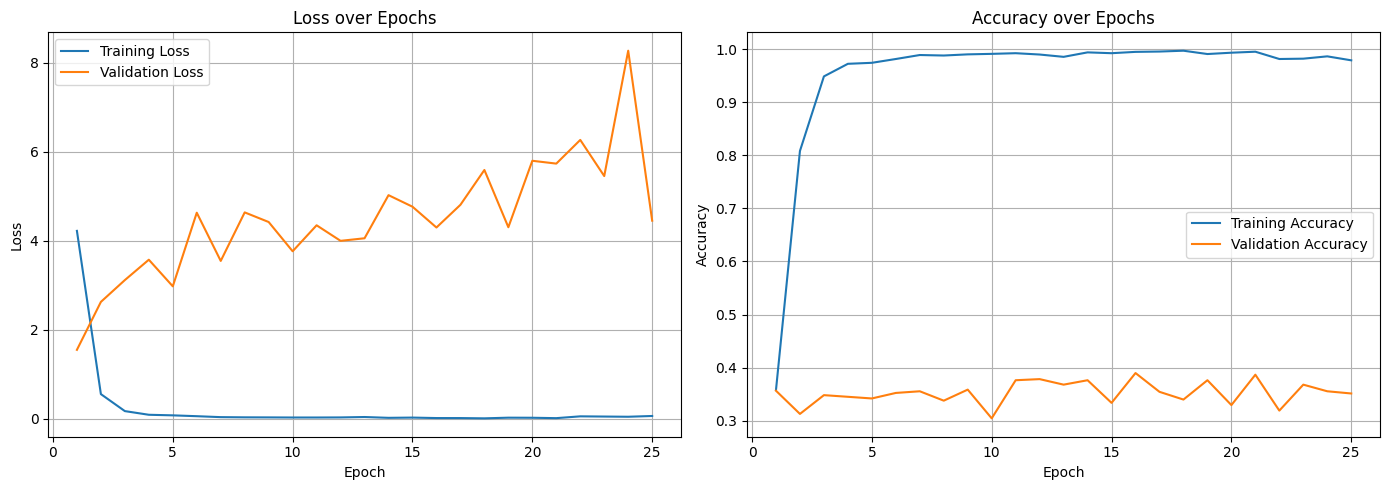

30/30 [==============================] - 20s 669ms/step - loss: 4.5484 - accuracy: 0.3490
Test Loss: 4.5484, Test Accuracy: 34.90%
1/1 [==============================] - 0s 86ms/step


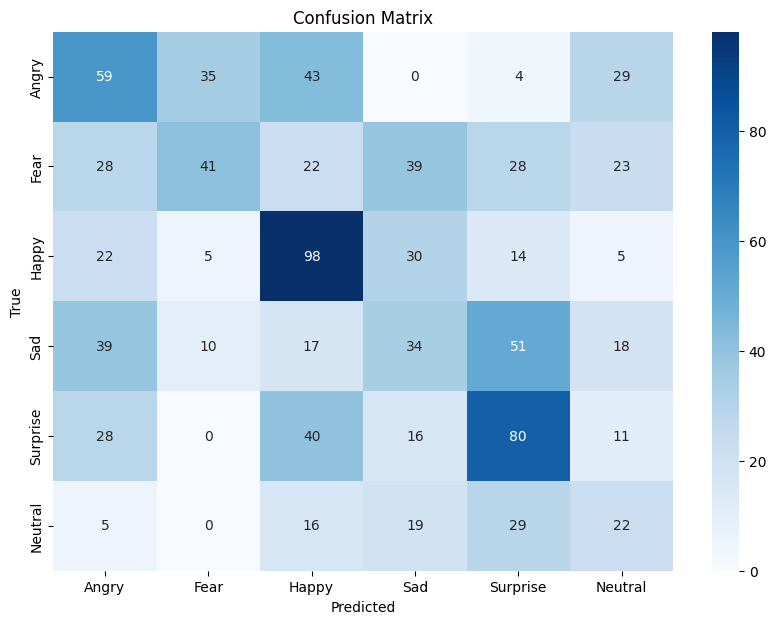

              precision    recall  f1-score   support

       Angry       0.33      0.35      0.34       170
        Fear       0.45      0.23      0.30       181
       Happy       0.42      0.56      0.48       174
         Sad       0.25      0.20      0.22       169
    Surprise       0.39      0.46      0.42       175
     Neutral       0.20      0.24      0.22        91

    accuracy                           0.35       960
   macro avg       0.34      0.34      0.33       960
weighted avg       0.35      0.35      0.34       960



In [ ]:
import tensorflow as tf
import librosa
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


# ================================
# 1. CẤU HÌNH & TIỀN XỬ LÝ ÂM THANH
# ================================

AUDIO_SAMPLE_RATE = 22050   # Số mẫu âm thanh mỗi giây
AUDIO_DURATION = 3          # Thời lượng âm thanh (giây)
MFCC_FEATURES = 40          # Số lượng đặc trưng MFCC
BATCH_SIZE = 32

def preprocess_audio(file_path):
    """Hàm xử lý âm thanh, trích xuất đặc trưng MFCC."""
    audio, sr = librosa.load(file_path, sr=AUDIO_SAMPLE_RATE, duration=AUDIO_DURATION)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=MFCC_FEATURES)

    target_width = int(AUDIO_SAMPLE_RATE * AUDIO_DURATION // 512)
    if mfcc.shape[1] < target_width:
        padded = np.zeros((MFCC_FEATURES, target_width))
        padded[:, :mfcc.shape[1]] = mfcc
    else:
        padded = mfcc[:, :target_width]
    return padded[..., np.newaxis]  # Thêm chiều kênh

# ==========================
# 2. VISUALIZE SAMPLE AUDIO
# ==========================
def visualize_audio(file_path):
    """Hiển thị sóng âm thanh và biểu đồ MFCC."""
    audio, sr = librosa.load(file_path, sr=AUDIO_SAMPLE_RATE, duration=AUDIO_DURATION)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=MFCC_FEATURES)

    plt.figure(figsize=(12, 5))

    # Biểu đồ sóng âm thanh
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(audio, sr=sr)
    plt.title("Waveform")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    # Biểu đồ MFCC
    plt.subplot(1, 2, 2)
    librosa.display.specshow(mfcc, sr=sr, x_axis='time', cmap='viridis')
    plt.title("MFCC Features")
    plt.xlabel("Time (s)")
    plt.ylabel("MFCC Coefficients")
    plt.colorbar(format="%+2.f")
    plt.tight_layout()
    plt.show()

# ============================
# 3. GENERATOR ĐỌC DỮ LIỆU
# ============================
def audio_data_generator(directory, batch_size):
    """Trình tạo dữ liệu từ thư mục."""
    label_map = {'Angry': 0, 'Fear': 1, 'Happy': 2, 'Sad': 3, 'Surprise': 4, 'Neutral': 5}
    while True:
        filepaths, labels = [], []
        for subdir in os.listdir(directory):
            subdir_path = os.path.join(directory, subdir)
            for fname in os.listdir(subdir_path):
                if fname.endswith('.wav'):
                    filepaths.append(os.path.join(subdir_path, fname))
                    labels.append(label_map[subdir])

        combined = list(zip(filepaths, labels))
        np.random.shuffle(combined)
        filepaths, labels = zip(*combined)

        for i in range(0, len(filepaths), batch_size):
            batch_files = filepaths[i:i + batch_size]
            batch_data = [preprocess_audio(f) for f in batch_files]
            batch_labels = [labels[j] for j in range(i, min(i + batch_size, len(labels)))]
            if len(batch_labels) < batch_size:
                continue
            yield np.array(batch_data), tf.keras.utils.to_categorical(batch_labels, 6)

# ==================
# 4. XÂY DỰNG MÔ HÌNH
# ==================
model_audio = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(MFCC_FEATURES, 129, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # 6 lớp tương ứng với 6 cảm xúc
])

model_audio.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ============================
# 5. HUẤN LUYỆN MÔ HÌNH CNN
# ============================
train_audio_gen = audio_data_generator('/content/drive/MyDrive/Colab Notebooks/Dataset/Train-RAVDESS', BATCH_SIZE)
val_audio_gen = audio_data_generator('/content/drive/MyDrive/Colab Notebooks/Dataset/Test-RAVDESS', BATCH_SIZE)

history = model_audio.fit(
    train_audio_gen,
    steps_per_epoch=100,
    validation_data=val_audio_gen,
    validation_steps=30,
    epochs=25
)

# Lưu mô hình
model_audio.save('emotion_audio_model.keras')

# ==========================
# 6. VẼ BIỂU ĐỒ LOSS & ACCURACY
# ==========================
def plot_history(history):
    epochs = range(1, len(history.history['loss']) + 1)

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['loss'], label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_history(history)

# ============================
# 7. ĐÁNH GIÁ MÔ HÌNH & DỰ ĐOÁN
# ============================
test_steps = 30
test_loss, test_acc = model_audio.evaluate(val_audio_gen, steps=test_steps)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc * 100:.2f}%")

# Ma trận nhầm lẫn
predictions = []
validation_labels = []

for _ in range(test_steps):
    x_val, y_val = next(val_audio_gen)
    preds = model_audio.predict(x_val)
    predicted_classes = np.argmax(preds, axis=1)

    predictions.extend(predicted_classes)
    validation_labels.extend(np.argmax(y_val, axis=1))

cm = confusion_matrix(validation_labels, predictions)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Angry', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'],
            yticklabels=['Angry', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Báo cáo phân loại
print(classification_report(validation_labels, predictions, target_names=['Angry', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']))
